In [1]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
img = cv2.imread("CV folder/dataset/ms_dhoni/images (16).jpeg")
cv2.imshow("Dhoni", img)
cv2.waitKey(3000)
cv2.destroyAllWindows()

In [3]:
img.shape

(194, 259, 3)

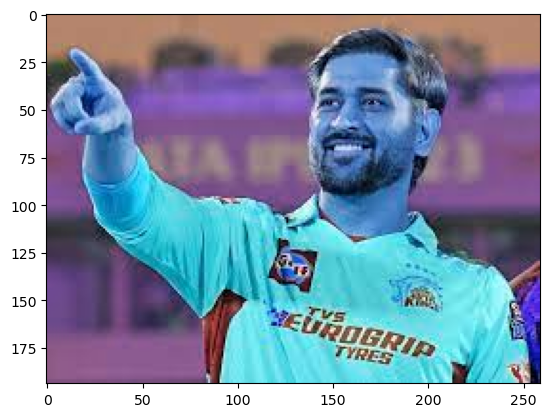

In [4]:
plt.imshow(img)

In [5]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_image.shape

(194, 259)

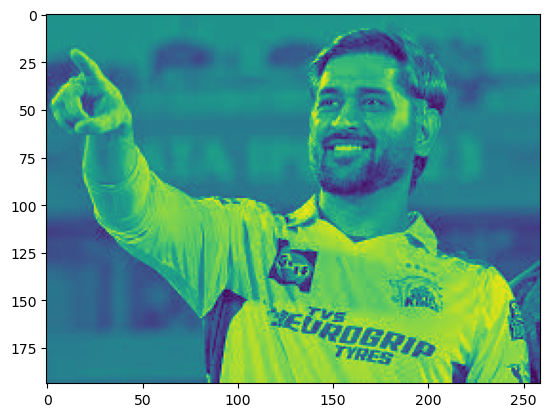

In [6]:
plt.imshow(gray_image)

In [7]:
face_cascade = cv2.CascadeClassifier("env/Lib/site-packages/cv2/data/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("env/Lib/site-packages/cv2/data/haarcascade_eye.xml")

In [8]:
face = face_cascade.detectMultiScale(gray_image, 1.3, 5)
face

array([[130,  22,  61,  61]])

In [9]:
(x,y,w,h) = face[0]
x, y, w, h

(130, 22, 61, 61)

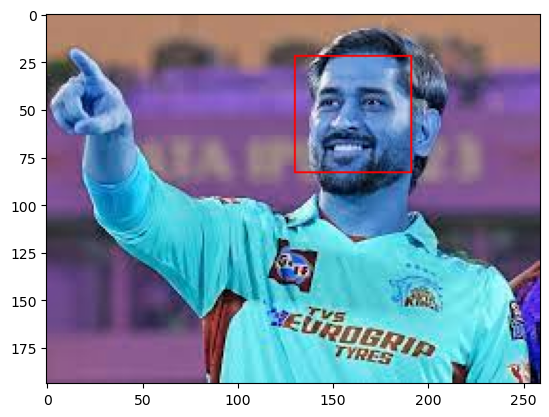

In [10]:
rect = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 1)
plt.imshow(rect)

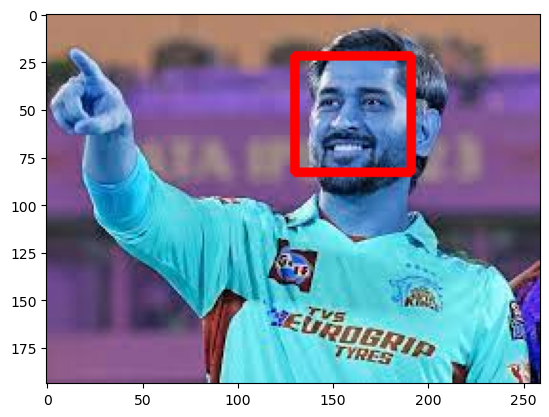

In [11]:
cv2.destroyAllWindows()

for (x,y,w,h) in face:
    face_detect = cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 3)
    roi_color_image = face_detect[y:y+h, x:x+w]
    roi_gray_image = gray_image[y:y+h, x:x+w]
    
    eye = eye_cascade.detectMultiScale(roi_gray_image)
    
    for (ex, ey, ew, eh) in  eye:
        cv2.rectangle(roi_color_image, (ex,ey), (ex+ew, ey+eh), (0,255,0), 2)

plt.figure()
plt.imshow(face_detect, cmap="gray")
plt.show()

## Data Cleaning

In [12]:
def cropped_images(image_path):
    image = cv2.imread(image_path)
    gry_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    face = face_cascade.detectMultiScale(gry_image, 1.3,5)
    for (x,y,w,h) in  face:
        roi_color_image = image[y:y+h, x:x+w,]
        roi_gray_image = gry_image[y:y+h, x:x+w]
        eye = eye_cascade.detectMultiScale(roi_gray_image)
        if len(eye) >= 2:
            return roi_color_image

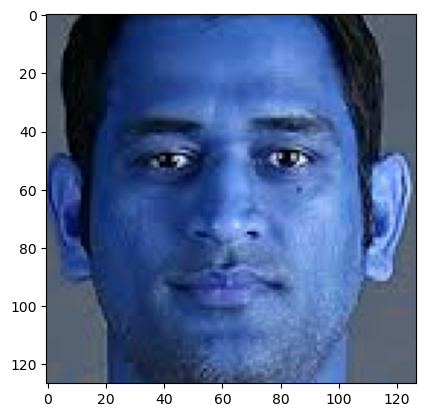

In [13]:
demo = cropped_images("CV folder/dataset/ms_dhoni/images.jpeg")
plt.imshow(demo)

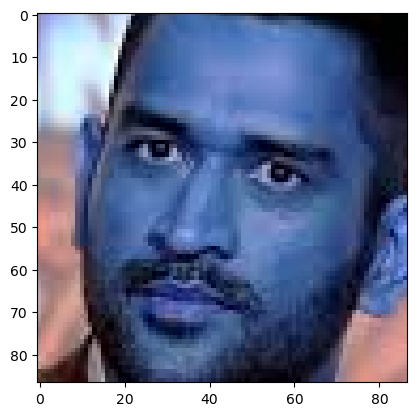

In [14]:
demo = cropped_images("CV folder/dataset/ms_dhoni/images (31).jpeg")
plt.imshow(demo)

In [15]:
path_of_folder = "CV folder/dataset/"
path_of_cropped_images_folder = "CV folder/dataset/cropped/"

In [16]:
import os

img_dirs = []

for entry in os.scandir(path_of_folder):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [17]:
img_dirs

['CV folder/dataset/cropped',
 'CV folder/dataset/james_anderson',
 'CV folder/dataset/lionel_messi',
 'CV folder/dataset/maria_sharapova',
 'CV folder/dataset/ms_dhoni',
 'CV folder/dataset/roger_federer',
 'CV folder/dataset/serena_williams',
 'CV folder/dataset/virat_kohli']

In [18]:
import shutil

if os.path.exists(path_of_cropped_images_folder):
    shutil.rmtree(path_of_cropped_images_folder)

os.mkdir(path_of_cropped_images_folder)

In [19]:
cropped_image_dirs = []
celebrity_file_name_dirs = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_name_dirs[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = cropped_images(entry.path)
        if roi_color is not None:
            cropped_folder = path_of_cropped_images_folder + celebrity_name
            if not os.path.exists(cropped_folder):
                os.mkdir(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print(f"Generating images in {cropped_folder}")
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            final_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(final_file_path, roi_color)
            celebrity_file_name_dirs[celebrity_name].append(final_file_path)
            count = count + 1

cropped
james_anderson
Generating images in CV folder/dataset/cropped/james_anderson
lionel_messi
Generating images in CV folder/dataset/cropped/lionel_messi
maria_sharapova
Generating images in CV folder/dataset/cropped/maria_sharapova
ms_dhoni
Generating images in CV folder/dataset/cropped/ms_dhoni
roger_federer
Generating images in CV folder/dataset/cropped/roger_federer
serena_williams
Generating images in CV folder/dataset/cropped/serena_williams
virat_kohli
Generating images in CV folder/dataset/cropped/virat_kohli


In [22]:
# new_path = "CV folder/dataset/new"

# path_ = "CV folder/dataset/cropped/ms_dhoni"
# count = 7 

# for entry in os.scandir(new_path):
#     roi = cropped_images(entry.path)
    
#     if roi is not None:
    
#         cropped_file_name = "ms_dhnoi" + str(count) + ".png"
#         final_file_path =  path_ + "/" + cropped_file_name

#         cv2.imwrite(final_file_path, roi)
#         count = count + 1

## Feature Engineering

In [20]:
import pywt

def w2d(img, mode="haar", level=1):
    image = img
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    modified = np.float32(gray_image)
    modified /= 255
    coef = pywt.wavedec2(modified, mode, level)
    
    coeffs_H=list(coef)  
    coeffs_H[0] *= 0;
    
    image_H=pywt.waverec2(coeffs_H, mode);
    image_H *= 255;
    image_H =  np.uint8(image_H)
    
    return image_H

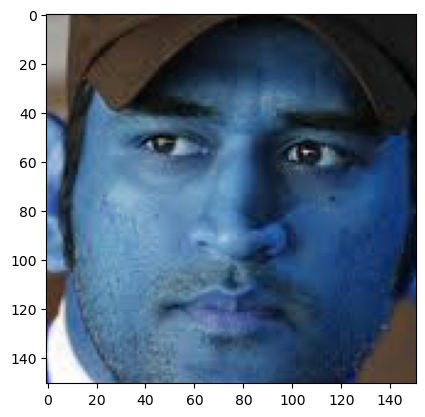

In [21]:
demo = cropped_images("CV folder/dataset/ms_dhoni/images (12).jpeg")
plt.imshow(demo)

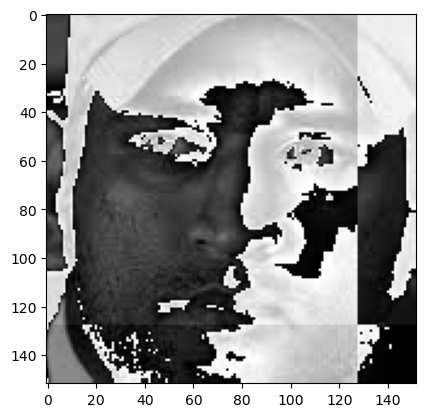

In [22]:
demo_1 = w2d(demo)
plt.imshow(demo_1, cmap="gray")

In [23]:
# celebrity_file_name_dirs["ms_dhoni"] = ['CV folder/dataset/cropped/ms_dhoni/ms_dhoni1.png',
#                                        'CV folder/dataset/cropped/ms_dhoni/ms_dhoni2.png',
#                                        'CV folder/dataset/cropped/ms_dhoni/ms_dhoni3.png',
#                                        'CV folder/dataset/cropped/ms_dhoni/ms_dhoni4.png',
#                                        'CV folder/dataset/cropped/ms_dhoni/ms_dhoni5.png',
#                                        'CV folder/dataset/cropped/ms_dhoni/ms_dhoni6.png',
#                                        'CV folder/dataset/cropped/ms_dhoni/ms_dhoni7.png',
#                                        'CV folder/dataset/cropped/ms_dhoni/ms_dhoni8.png',
#                                        'CV folder/dataset/cropped/ms_dhoni/ms_dhoni9.png',
#                                        'CV folder/dataset/cropped/ms_dhoni/ms_dhoni10.png',
#                                        'CV folder/dataset/cropped/ms_dhoni/ms_dhoni11.png',
#                                        'CV folder/dataset/cropped/ms_dhoni/ms_dhoni12.png',
#                                        'CV folder/dataset/cropped/ms_dhoni/ms_dhoni13.png',
#                                        'CV folder/dataset/cropped/ms_dhoni/ms_dhoni14.png',
#                                        'CV folder/dataset/cropped/ms_dhoni/ms_dhoni15.png',
#                                        'CV folder/dataset/cropped/ms_dhoni/ms_dhoni16.png',
#                                        'CV folder/dataset/cropped/ms_dhoni/ms_dhoni17.png']

In [24]:
class_num = {}
count = -1

for celebrity_name in celebrity_file_name_dirs.keys():
    class_num[celebrity_name] = count
    count += 1
    
class_num

{'cropped': -1,
 'james_anderson': 0,
 'lionel_messi': 1,
 'maria_sharapova': 2,
 'ms_dhoni': 3,
 'roger_federer': 4,
 'serena_williams': 5,
 'virat_kohli': 6}

In [25]:
X = [] 
y = []

for keys, values in celebrity_file_name_dirs.items():
    for image in values:
        img = cv2.imread(image)
        if img is None:
            continue
        resized_img = cv2.resize(img, (32,32))
        img_har = w2d(img,'db1',5)
        resized_img_har = cv2.resize(img_har, (32,32))
        combined_img = np.vstack((resized_img.reshape(32*32*3,1),resized_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_num[keys])

In [26]:
len(X[0])

4096

In [27]:
y[-1]

6

In [28]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(212, 4096)

In [29]:
len(y)

212

## Model Train

In [30]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

model = Pipeline([
    ("scaler" , StandardScaler()),
    ("svc" , SVC(kernel = 'rbf', C = 10, probability=True))
])

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7906976744186046

In [33]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       1.00      0.75      0.86         4
           2       0.88      1.00      0.93         7
           3       1.00      0.40      0.57         5
           4       0.57      0.80      0.67         5
           5       0.67      0.57      0.62         7
           6       0.79      1.00      0.88        11

    accuracy                           0.79        43
   macro avg       0.84      0.75      0.77        43
weighted avg       0.82      0.79      0.78        43



## Hyperparameter Tuning

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression


model_params = {
    'svm': {
        'model': SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [35]:
from sklearn.model_selection import GridSearchCV

scores = []
best_estimator = {}

for model_name, param in model_params.items():
    pipe = make_pipeline(StandardScaler(), param['model'])
    
    clf = GridSearchCV(pipe, param['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    
    scores.append({
        "model": model_name,
        "best_score": clf.best_score_,
        "best_params": clf.best_params_
    })
    best_estimator[model_name] = clf.best_estimator_
    
data = pd.DataFrame(scores, columns=['model','best_score','best_params'])
data

,model,best_score,best_params
0,svm,0.781462,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.503209,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.786988,{'logisticregression__C': 5}


In [36]:
best_estimator["svm"].score(X_test, y_test)

0.813953488372093

In [37]:
best_estimator["logistic_regression"].score(X_test, y_test)

0.7441860465116279

In [38]:
best_estimator["random_forest"].score(X_test, y_test)

0.627906976744186

Text(50.722222222222214, 0.5, 'Truth')

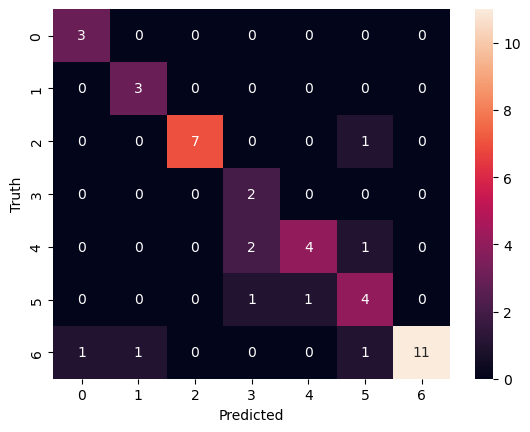

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(model.predict(X_test), y_test)

sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [40]:
class_num

{'cropped': -1,
 'james_anderson': 0,
 'lionel_messi': 1,
 'maria_sharapova': 2,
 'ms_dhoni': 3,
 'roger_federer': 4,
 'serena_williams': 5,
 'virat_kohli': 6}

## Saving the model

In [41]:
import joblib

joblib.dump(model, "saving_the_model.pkl")

['saving_the_model.pkl']

In [42]:
import json

with open("column_directory.json", 'w') as file:
    file.write(json.dumps(class_num))